### Discogs market analyzing tool
This project provides a comprehensive tool for analyzing trends in the music industry, allowing a deeper understanding of changes in music publishing over the years, taking into account different genres, countries and formats. Interactive elements allow users to explore the data on their own, making the project valuable for both researchers and those interested in music history.

### Technologies and libraries
The project uses popular Python libraries for data analysis and visualization:

	- pandas for data manipulation
	- matplotlib for creating graphs
	- numpy for numerical calculations
	- ipywidgets for creating interactive elements
	- scikit-learn for predictive analysis

Authors: Kacper Tyszkiewicz, Mateusz Wiśniewski

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [2]:
FILENAME = "release_data_styles.csv"

# https://www.kaggle.com/datasets/sohrabdaemi/discogs-database-all-release-data?resource=download
# Download data from there, extract .zip and move release_data_styles.csv to project root

In [3]:
# Read file
df = pd.read_csv(FILENAME)
print(f"Rows in csv file: {len(df)}")

Rows in csv file: 31257071


In [4]:
df.head()

,release_id,country,year,genre,style,format
0,1,Sweden,1999.0,Electronic,Deep House,Vinyl
1,2,Sweden,1998.0,Electronic,Broken Beat,Vinyl
2,2,Sweden,1998.0,Electronic,Techno,Vinyl
3,2,Sweden,1998.0,Electronic,Tech House,Vinyl
4,3,US,1999.0,Electronic,Techno,CD


In [5]:
# Unique releases
unique_releases = df.drop_duplicates(subset=['release_id'])
unique_releases.head()

,release_id,country,year,genre,style,format
0,1,Sweden,1999.0,Electronic,Deep House,Vinyl
1,2,Sweden,1998.0,Electronic,Broken Beat,Vinyl
4,3,US,1999.0,Electronic,Techno,CD
6,4,US,1999.0,Electronic,House,CD
8,5,Germany,1995.0,Electronic,Abstract,CD


In [6]:
print(f"Unique releases: {len(unique_releases)}")

Unique releases: 12867980


In [7]:
print("Unique releases in 1980:", len(unique_releases[unique_releases["year"] == 1980]))
print("Unique releases in 2000:", len(unique_releases[unique_releases["year"] == 2000]))
print("Unique releases in 2020:", len(unique_releases[unique_releases["year"] == 2020]))
print("Unique releases in 2021:", len(unique_releases[unique_releases["year"] == 2021]))

Unique releases in 1980: 137253
Unique releases in 2000: 224676
Unique releases in 2020: 124458
Unique releases in 2021: 1


### Discogs database growth over time

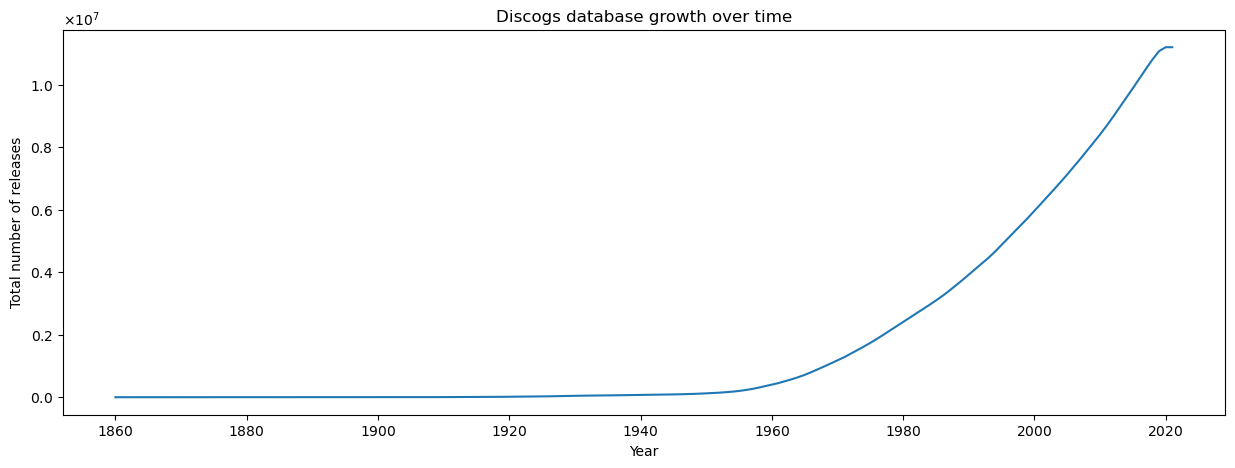

In [8]:
def plot_data_volume(df):
    data_volume = df.groupby('year').size().cumsum()
    plt.figure(figsize=(15, 5))
    plt.plot(data_volume.index, data_volume.values)
    plt.xlabel("Year")
    plt.ylabel("Total number of releases")
    plt.title("Discogs database growth over time")
    plt.ticklabel_format(useMathText=True)
    plt.show()

plot_data_volume(unique_releases)


### Plot releases by year from set genre/style, country and format

In [9]:
# Plot graph
def plot_graph(selected_style, selected_country, selected_format):
    plt.close("all")
    
    # Filter data
    data = filter_dataframe(df, "style", selected_style)
    data = filter_dataframe(data, "country", selected_country)
    data = filter_dataframe(data, "format", selected_format)
    data = data.groupby("year").size()
    data = data.reset_index(name="count")
    
    # Plot
    plt.clf()
    plt.figure(figsize=(15, 5))
    plt.plot(data["year"], data["count"])
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title(f"Number of releases per year - {selected_style}")
    plt.show()
    
def filter_dataframe(df, header, option):
    return df if option == 'All' else df[df[header] == option]


In [10]:
# Dropdown values
style_options = ['All'] + df['style'].value_counts().index.tolist()
country_options = ['All'] + df['country'].value_counts().index.tolist()
format_options = ['All'] + df['format'].value_counts().index.tolist()

In [11]:
# Dropdown with plot
interactive_plot = widgets.interactive(plot_graph,
    # Style dropdown
    selected_style=widgets.Dropdown(
    options=style_options,
    description='Music style:',
    style={'description_width': 'initial'}),
    # Country dropdown
    selected_country=widgets.Dropdown(
    options=country_options,
    description='Country:',
    style={'description_width': 'initial'}),
    # Format dropdown
    selected_format=widgets.Dropdown(
    options=format_options,
    description='Format:',
    style={'description_width': 'initial'})
)
interactive_plot

interactive(children=(Dropdown(description='Music style:', options=('All', 'Pop Rock', 'Synth-pop', 'Vocal', '…

### Polynomial regression - prediction of vinyl releases based on history

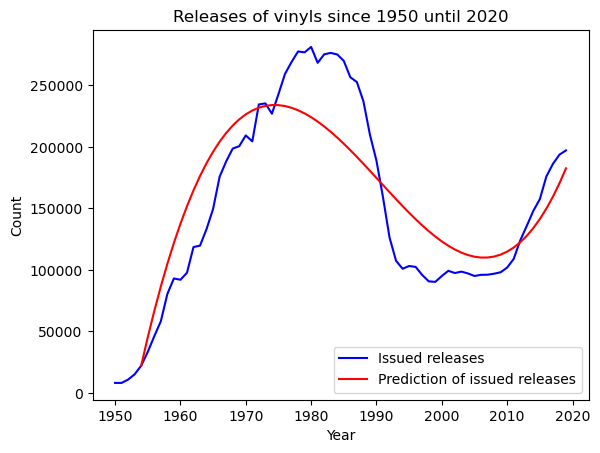

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data = df[df["year"] >= 1950]
data = data[data["year"] < 2020]

data = data[data["format"] == "Vinyl"]
data = data.groupby("year").size()
data = data.reset_index(name="count")

X = data["year"]
Y = data["count"]

poly = PolynomialFeatures(degree=4)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y)
y_predicted = poly_reg_model.predict(poly_features)

plt.plot(X, Y, c="b", label="Issued releases")
plt.plot(X[y_predicted > 0], y_predicted[y_predicted > 0], c="red", label="Prediction of issued releases")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Releases of vinyls since 1950 until 2020")
plt.show()